- Author   -  Saurav vara prasad Channuri

- Roll No -  ES16BTECH11007

- cross - correlation










In [0]:
import numpy as np
import scipy.misc as sp
from skimage import io
from scipy import ndimage as nd
import matplotlib
import scipy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
image_one = "u2cuba.jpg"
kernel_one = "trailer.png"


image_two = "laughter-yoga.jpg"
kernel_two = "crop"

In [0]:
real_image = io.imread(image_one)
screenshot = io.imread(kernel_one)

real_image_grey = io.imread(image_one, as_gray=True)
screenshot_grey = io.imread(kernel_one, as_gray=True)

real_image1 = io.imread(image_two)
screenshot1 = io.imread(kernel_two)

real_image_grey1 = io.imread(image_two, as_gray=True)
screenshot_grey1 = io.imread(kernel_two, as_gray=True)

In [21]:
fillter = np.empty([3,3,screenshot.shape[2]])
print "real image shape = ", real_image.shape
print "screenshot shape = ", screenshot.shape

real image shape =  (1063, 1250, 3)
screenshot shape =  (21, 22, 3)


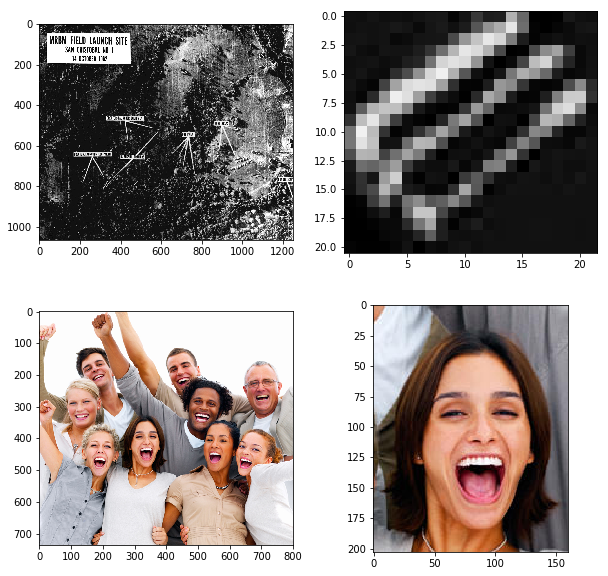

In [22]:
f, axarr = plt.subplots(2,2)
axarr[0][0].imshow(real_image)
axarr[0][1].imshow(screenshot)

axarr[1][0].imshow(real_image1)
axarr[1][1].imshow(screenshot1)

scipy.signal.correlate2d(real_image_grey, screenshot_grey, mode='same')

In [0]:
def pad( image, template ):
    
    
    top = image[0]
    top = np.tile(top, (template.shape[0]/2, 1))
    image = np.vstack((top, image)) # top padding
    
    bottom = image[-1]
    image = np.vstack((image, top)) # Botton padding
    
    
    left = image.T[0]
    left = np.tile(left, (template.shape[1]/2, 1))
    image = np.vstack((left, image.T)).T   # left padding
    
    right = image.T[-1]
    right = np.tile(right, (template.shape[1]/2, 1))
    image = np.vstack((image.T, right)).T  # right padding
    
    return image
    
    

In [0]:
def plot(image, template, corr_output, corr):
  
  real_image_grey = image
  screenshot_grey = template
  
  
  # for adjusting the display figure size
  matplotlib.rcParams['figure.figsize'] = [10, 10]
  matplotlib.rcParams.update({'font.size': 10})

  # plotting images in a grid
  y, x = np.unravel_index(np.argmax(corr), corr.shape) 

  fig, ([[ax_orig, ax_template], [ax_corr, ax_corr_norm]]) = plt.subplots(2, 2)

  # plotting real image
  ax_orig.imshow(real_image_grey, cmap='gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()

  # plotting correlation output
  ax_template.imshow(screenshot_grey, cmap='gray')
  ax_template.set_title('template')
  ax_template.set_axis_off()

  #plotting the edges to show that correlation is working
  ax_corr.imshow(corr, cmap='gray')
  ax_corr.set_title('cross correlation without normalization')
  ax_corr.set_axis_off()

  #plotting cross correlation output with normalization
  ax_corr_norm.imshow(corr_output, cmap='gray')
  ax_corr_norm.set_title('cross correlation output with normalization')
  ax_corr_norm.set_axis_off()

  ax_orig.plot(x, y, 'ro', linewidth = 100)
  ax_corr.plot(x, y, 'ro', linewidth = 100)
  ax_corr_norm.plot(x, y, 'ro', linewidth = 100)

  fig.show()

In [0]:
def cross_correlation_without_normalization(image, template):
  real_image_grey = image
  screenshot_grey = template
  
  fillter = (screenshot_grey - screenshot_grey.mean())/screenshot_grey.std()
  padded = pad(real_image_grey, screenshot_grey)
  corr_output = np.empty(real_image_grey.shape)

  for i in range(real_image_grey.shape[0]):
      for j in range(real_image_grey.shape[1]):
          temp_matrix = padded[i:i+fillter.shape[0] , j:j+fillter.shape[1]]

          # Normalization part of cross correlation
#           row_sums = temp_matrix.sum(axis=1)
#           temp_matrix = temp_matrix / row_sums[:, np.newaxis]

          corr_output[i][j] = np.sum(fillter*temp_matrix)
  
  return corr_output

In [0]:
def cross_correlation_normalization(image, template):
  real_image_grey = image
  screenshot_grey = template
  
  fillter = (screenshot_grey - screenshot_grey.mean())/screenshot_grey.std()
  padded = pad(real_image_grey, screenshot_grey)
  corr_output = np.empty(real_image_grey.shape)

  for i in range(real_image_grey.shape[0]):
      for j in range(real_image_grey.shape[1]):
          temp_matrix = padded[i:i+fillter.shape[0] , j:j+fillter.shape[1]]

          # Normalization part of cross correlation
          row_sums = temp_matrix.sum(axis=1)
          temp_matrix = temp_matrix / row_sums[:, np.newaxis]

          corr_output[i][j] = np.sum(fillter*temp_matrix)
          

  return corr_output

In [0]:
def cross_correlation(image, template):
  
  corr_output = cross_correlation_normalization(image, template)
  print "correlation with normaliation done \n"
  
  corr        = cross_correlation_without_normalization(image,template)
  print "correlation without normalization done \n"
  
  plot(image, template, corr_output, corr)
  print "plots done"
  print "____________________________________________________________\n"
  

correlation with normaliation done 

correlation without normalization done 

plots done
____________________________________________________________

correlation with normaliation done 

correlation without normalization done 

plots done
____________________________________________________________



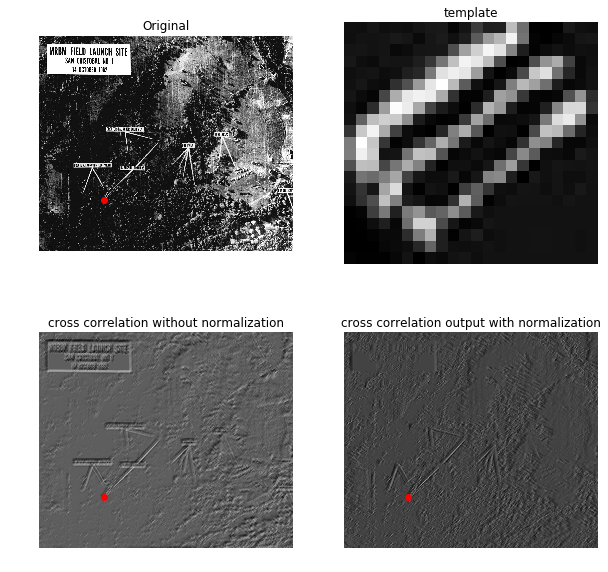

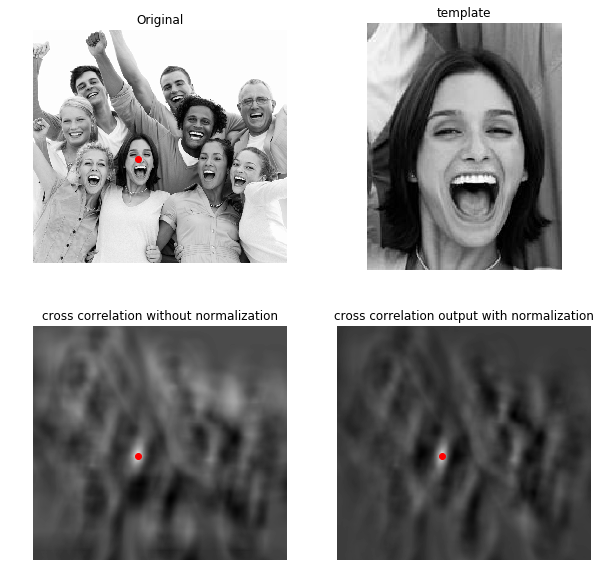

In [28]:
cross_correlation(real_image_grey, screenshot_grey)
cross_correlation(real_image_grey1, screenshot_grey1)


# Question - 1a

- In the above group image, we can look at a peak at the position of the face of the woman that we correlate the image with 

- During correlation we take a dot product of the kernel and parts of the image and stride our kernel

- Whenever we take a dot product of the kernel with the image, zero center the kernel before multiplying it with the portions of the image at each stride

- In Normalized cross correlation we also zero center the part of the image we multiply with the kernel

- When we zero center and multiply, all the high intensities that are evenly distributed will near zero and the low intensity images will also near zero resulting in dark parts of the correlation output as their mean is zero with very low variance. 

- When we multiply the part of the image that exactly matches the kernel, its like squaring all the pixels and summing them up resulting in bright spots. Thats how we identify templates using cross correlation  

# Question 1b
-  In the template we have three straight lines with mostly uniform intensities

- When we try to correlate the template with the image at multiple parts, we get value in between maxima and minina at the parts of the image with straight lines

- So, in the output of the correlation image, we have straight line cravings as can be observed.

# Question 1c

- when we cross correlated the "u2cuba" image with the short kernel, it only takes the local pixels that really matters for the peak to occur in the original position of the template.

- The small template has small resolution and it correlates with small locality of the image.

- But when we stride the "u2cuba" image with bigger template, it takes into consideration a bigger locality in the image since the template now has more resolution reducing the peak intensity that was supposed to occur at the real position. 

- There is a high chance that the peak intensity may occur at another place that is not the real position of the kernel we are correlating with. And it heavily gets influenced by the increased neighbourhood.


#### Limitations of cross correlation
- we can observe that the peak intensity at the right position gets highly influenced by neighbourhood, kernels with bigger resolution may not work good.

- The kernel should be of the same resolution as the part of the image that we are correlating with.



# Question 1d

- the number of possible rotations = Nr
- Number of possible sizes of the object = Ns
- The computatinal complexity for multiplying the kernel with the image part = m*m
- since we want the output to be of same size, the number of strides will be of the same number of pixels of the image = m*m

- Hence the total computational complexity for searching an object in the image = (m*m)*(n*n)*(Nr)*(Ns) 